<a href="https://colab.research.google.com/github/paascorb/TrabajoAAI/blob/main/TrabajoAAI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Trabajo Aprendizaje Automático I

En estre trabajo se va a intentar pasar por todos los contenidos vistos en la asignatura referente al apartado de aprendizaje no supervisado. Los datos utilizados han sido proporcionados por Vicente Marco del Departamento de Agricultura y Alimentación.

En estos datos encontramos, para una serie de biomas o habitats, cuántos insectos y arañas han sido encontrados. Estos animales están diferenciados por su orden.
Como son datos de un proyecto real, y en principio no han sido tratados, parece interesante ver si son datos interesantes para la naturaleza de este trabajo y si se puede hacer clustering con ellos.

# 1. Datos BioDiVine 2011

## Tratamiento de datos

Este apartado no toca los temas más importantes de la asignatura, pero es necesario hacerlo y parece interesante realizarlo por mayor completitud.

Primero importamos todos los CSV, en este caso hay 20, 10 para cada tipo de trampa (Combi o Pitfall), y en cada trampa 10 semanas. En este caso diferenciar por trampas o semanas parece agregar complejidad, así que vamos a aunar todo en un solo dataset.

In [417]:
import pandas as pd
import numpy as np
from functools import reduce

#Combi:
df = []
for i in range(1, 11):
  df.append(pd.read_csv('Combi_{0}_2011.csv'.format(i), delimiter=';', 
                        encoding= 'unicode_escape').fillna(0).iloc[:-1 , 1:].iloc[:, :-1])
#Pitfall:
for i in range(1, 11):
  df.append(pd.read_csv('Pitfal_{0}_2011.csv'.format(i), delimiter=';', 
                        encoding= 'unicode_escape').fillna(0).iloc[:-1 , 1:].iloc[:, :-1])
df = reduce(lambda a, b: a.add(b, fill_value=0), df)
df.head(5)

,1,2,3,4,5,6,7,8,9,10,...,16,17,18,19,20,21,22,23,24,25
0,5.0,1.0,4.0,2.0,5.0,3.0,4.0,2.0,2.0,0.0,...,3.0,1.0,3.0,2.0,2.0,7.0,1.0,2.0,3.0,2.0
1,2.0,6.0,2.0,3.0,0.0,6.0,8.0,2.0,5.0,3.0,...,2.0,2.0,1.0,4.0,5.0,4.0,2.0,2.0,1.0,4.0
2,4.0,2.0,1.0,0.0,1.0,2.0,1.0,1.0,2.0,1.0,...,2.0,1.0,1.0,0.0,0.0,4.0,4.0,6.0,0.0,1.0
3,5.0,10.0,4.0,0.0,13.0,34.0,148.0,15.0,7.0,1.0,...,4.0,6.0,6.0,3.0,3.0,2.0,0.0,4.0,0.0,2.0
4,0.0,0.0,0.0,3.0,1.0,0.0,0.0,3.0,0.0,0.0,...,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0


Ya tenemos nuestro dataset. Las 25 columnas representan los habitats de la siguiente manera:
 - 1-5: Olivo
 - 6-10: Pradera
 - 11-15: Viñedo
 - 16-20: Maquia Mediterránea
 - 21-25: Bosque Mediterráneo

In [212]:
df.describe()

,1,2,3,4,5,6,7,8,9,10,...,16,17,18,19,20,21,22,23,24,25
count,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,...,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000
mean,5.458182,5.841818,4.229091,3.916364,2.930909,3.445455,3.900000,4.201818,6.043636,11.856364,...,5.574545,4.627273,4.480000,2.789091,3.610909,10.290909,8.400000,12.485455,4.145455,3.269091
std,22.413750,21.463708,16.630624,13.564805,9.352573,11.110790,12.892543,14.027075,21.201134,172.301562,...,23.848965,17.413465,19.302655,11.761870,17.804685,159.110171,50.241928,90.674696,17.207846,13.427548
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000
max,315.000000,235.000000,149.000000,133.000000,87.000000,118.000000,148.000000,174.000000,279.000000,4028.000000,...,418.000000,204.000000,222.000000,154.000000,334.000000,3716.000000,890.000000,1496.000000,230.000000,203.000000


Podemos comprobar, gracias a estos estadísticos, que hay muchisíma dispersión en general. Y que las diferencias entre media y mediana son enormes. Eso es que que casi todos los datos están a cero. Pero eso ya lo sabiamos porque es una matriz con muchos huecos.

Vamos a ver relaciones entre columnas:

In [213]:
import numpy as np

corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25
1,1.000000,0.860128,0.845022,0.711330,0.660864,0.759668,0.547621,0.594224,0.573598,0.638716,0.687054,0.705977,0.775910,0.758064,0.737655,0.541919,0.658270,0.580376,0.685746,0.875068,0.138133,0.519637,0.327214,0.583047,0.660979
2,0.860128,1.000000,0.855827,0.813396,0.724284,0.848355,0.655352,0.632047,0.567088,0.291372,0.694207,0.758759,0.763734,0.792025,0.745392,0.539715,0.690889,0.714024,0.728528,0.605993,0.088298,0.386820,0.282345,0.595629,0.747358
3,0.845022,0.855827,1.000000,0.760080,0.729219,0.849020,0.590669,0.587667,0.532665,0.359609,0.796936,0.821336,0.740949,0.813943,0.714503,0.492214,0.663563,0.649394,0.674520,0.640057,0.053141,0.379355,0.391605,0.588600,0.699989
4,0.711330,0.813396,0.760080,1.000000,0.719128,0.825877,0.596556,0.588731,0.550750,0.097946,0.785652,0.780873,0.710897,0.798145,0.807525,0.578454,0.742692,0.680767,0.727984,0.486905,0.130136,0.354832,0.325334,0.600100,0.752174
5,0.660864,0.724284,0.729219,0.719128,1.000000,0.712543,0.593650,0.585032,0.501336,0.134487,0.664340,0.656914,0.698679,0.764444,0.699164,0.543574,0.665356,0.557500,0.681530,0.467759,0.173271,0.398899,0.356176,0.585815,0.664015
6,0.759668,0.848355,0.849020,0.825877,0.712543,1.000000,0.693120,0.633332,0.548133,0.185644,0.775221,0.776829,0.739060,0.802548,0.762203,0.590896,0.746790,0.709516,0.757647,0.542895,0.130089,0.394751,0.362054,0.654175,0.782120
7,0.547621,0.655352,0.590669,0.596556,0.593650,0.693120,1.000000,0.539757,0.435197,0.088509,0.540540,0.551700,0.533289,0.611070,0.569223,0.544922,0.618157,0.560123,0.573334,0.390660,0.249918,0.394887,0.330975,0.554380,0.598639
8,0.594224,0.632047,0.587667,0.588731,0.585032,0.633332,0.539757,1.000000,0.842020,0.184948,0.559113,0.600151,0.661647,0.697010,0.669892,0.593105,0.670531,0.556975,0.707185,0.501316,0.239628,0.453489,0.363776,0.617799,0.678507
9,0.573598,0.567088,0.532665,0.550750,0.501336,0.548133,0.435197,0.842020,1.000000,0.260198,0.541153,0.613092,0.652658,0.594708,0.631808,0.525322,0.621444,0.473738,0.585100,0.508885,0.222820,0.397819,0.256599,0.531828,0.607724
10,0.638716,0.291372,0.359609,0.097946,0.134487,0.185644,0.088509,0.184948,0.260198,1.000000,0.141597,0.173637,0.379524,0.185254,0.180417,0.077487,0.093893,0.080018,0.103289,0.825707,0.023859,0.332990,0.170454,0.106557,0.081463


Vemos que algunos habitats coinciden con sus cinco filas en la correlación, pero otros parecen no tener ningúna relación. Quizá con más datos se verían esos bloques de 5 en 5 en la diagonal.

Quizá para simplificar más, podemos agrupar los distintos habitats, y de esta forma tener solo 5 columnas:

In [214]:
df['01'] = df['1'] + df['2'] + df['3']+ df['4'] + df['5']
df['02'] = df['6'] + df['7'] + df['8']+ df['9'] + df['10']
df['03'] = df['11'] + df['12'] + df['13']+ df['14'] + df['15']
df['04'] = df['16'] + df['17'] + df['18']+ df['19'] + df['20']
df['05'] = df['21'] + df['22'] + df['23']+ df['24'] + df['25']
df = df.iloc[: , 25:]
df

,01,02,03,04,05
0,17.0,11.0,15.0,11.0,15.0
1,13.0,24.0,18.0,14.0,13.0
2,8.0,7.0,6.0,4.0,15.0
3,32.0,205.0,24.0,22.0,8.0
4,4.0,3.0,2.0,5.0,0.0
...,...,...,...,...,...
545,20.0,35.0,71.0,17.0,5.0
546,2.0,0.0,8.0,14.0,1.0
547,2.0,1.0,9.0,0.0,0.0
548,0.0,1.0,0.0,0.0,0.0


Veamos ahora las correlaciones:

In [215]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,01,02,03,04,05
01,1.000000,0.558621,0.894738,0.824740,0.341004
02,0.558621,1.000000,0.428257,0.464688,0.237034
03,0.894738,0.428257,1.000000,0.830153,0.353216
04,0.824740,0.464688,0.830153,1.000000,0.703101
05,0.341004,0.237034,0.353216,0.703101,1.000000


## Tendencia de clustering

Primero, para ver si tiene sentido hacer clústering vamos evaluarlo con el estadístico de Hopkins y el método VAT.

In [216]:
pip install pyclustertend

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [217]:
from pyclustertend import hopkins, vat

hopkins(df,550)

0.017160218001602008

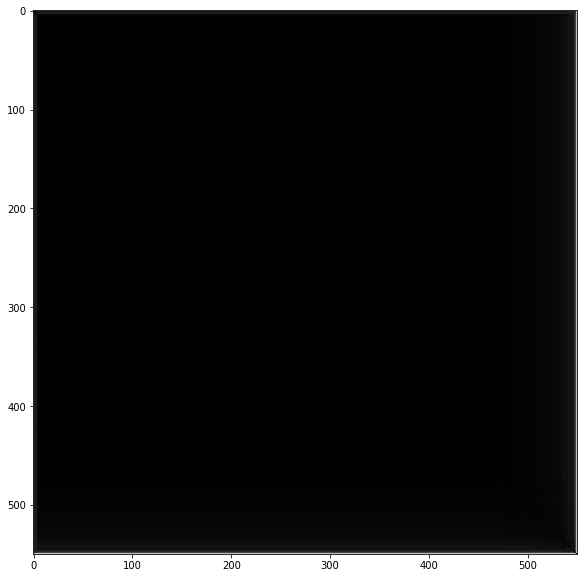

In [418]:
vat(df)

Vamos a visualizar el Olivo y la padrera:

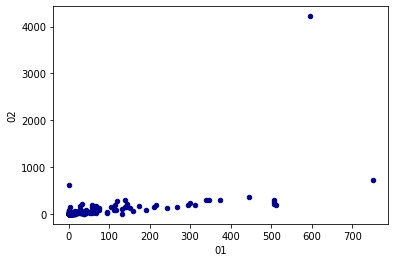

In [219]:
 df.plot.scatter(x='01', y='02', c='DarkBlue')

Realmente no parecería interesante hacer clustering con estos datos. No tiene pinta que podamos diferenciar cada fila (un tipo de insecto o araña) con el número de veces que se encontró en un habitat dentro de grupos diferenciados.

Pero aún así vamos a continuar un poco para ver qué nos dicen los métodos.

## KMeans

Como son 24 grupos de insectos distintos vamos a poner inicialmente k = 24.

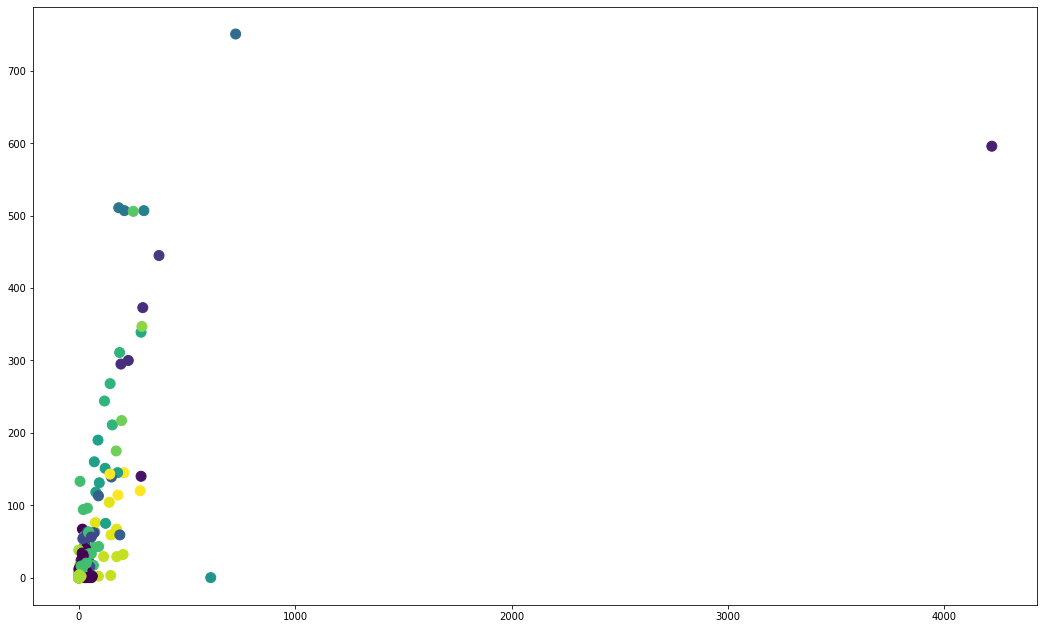

In [220]:
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

kmeans = KMeans(n_clusters = 24, init = 'k-means++')
y_kmeans = kmeans.fit_predict(df)

fig, ax = plt.subplots(figsize=(18, 11))
plt.scatter(df['02'], df['01'], c=kmeans.labels_, s=100)
plt.show()

Con esto no podemos scar ninguna conclusión, veamos si proyectamos a 2 dimensiones:

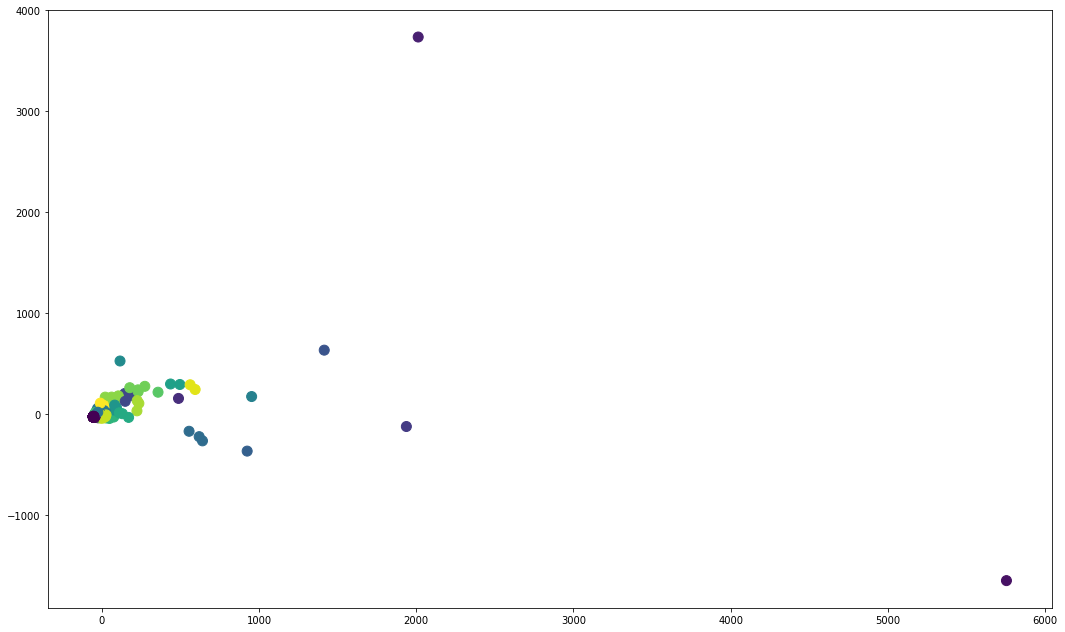

In [221]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_result = pca.fit_transform(df.values)

df_pca = pd.DataFrame()

df_pca['1'] = pca_result[:,0]
df_pca['2'] = pca_result[:,1]

kmeans = KMeans(n_clusters = 24, init = 'k-means++')
y_kmeans = kmeans.fit_predict(df_pca)

fig, ax = plt.subplots(figsize=(18, 11))
plt.scatter(df_pca['1'], df_pca['2'], c=kmeans.labels_, s=100)
plt.show()

Podemos ver también que hay una serie de datos "extremos" que hacen que el resto se distorsione un poco. Vamos a ver que pasa si eliminamos estos datos:

In [222]:
df_pca.describe()

,1,2
count,5.500000e+02,5.500000e+02
mean,-1.653627e-15,-3.720660e-15
std,2.989388e+02,1.862752e+02
min,-5.330941e+01,-1.644596e+03
25%,-5.266950e+01,-2.295605e+01
50%,-5.061300e+01,-2.104787e+01
75%,-3.874073e+01,-1.455382e+01
max,5.753168e+03,3.735764e+03


Con esto y el grafico anterior vemos que todos los que tengan en la primera componente más de 900 son demasiado extremos, vamos a eliminarlos.

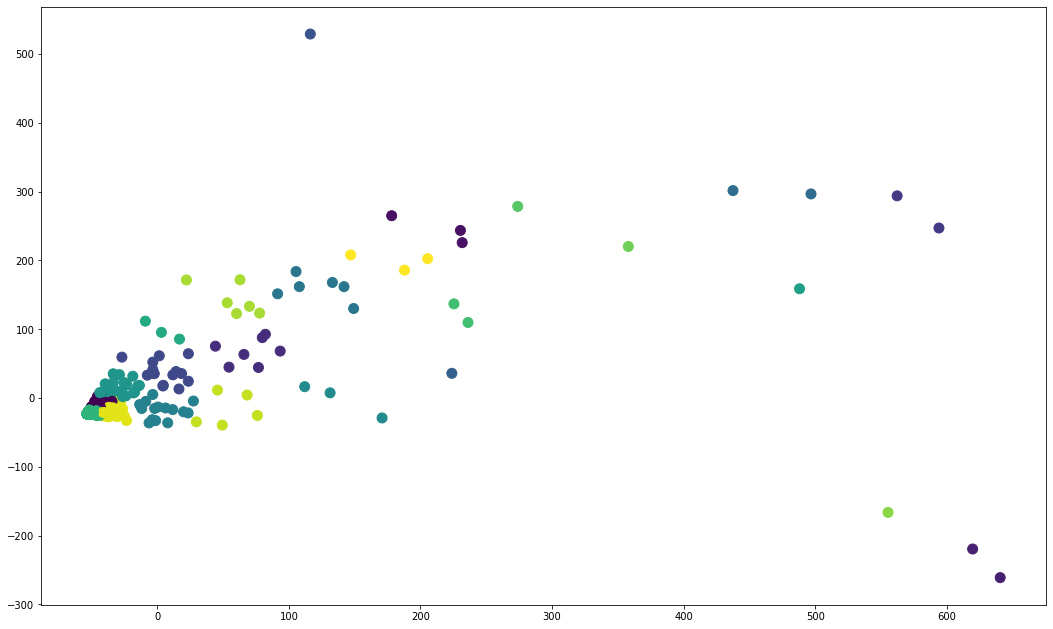

In [223]:
df_pca2 = df_pca.loc[df_pca['1'] <= 900]

kmeans = KMeans(n_clusters = 24, init = 'k-means++')
y_kmeans = kmeans.fit_predict(df_pca2)

fig, ax = plt.subplots(figsize=(18, 11))
plt.scatter(df_pca2['1'], df_pca2['2'], c=kmeans.labels_, s=100)
plt.show()

Ahora podemos verlo mejor, pero sigen estando muy dispersos. Reduzcamos a 0.

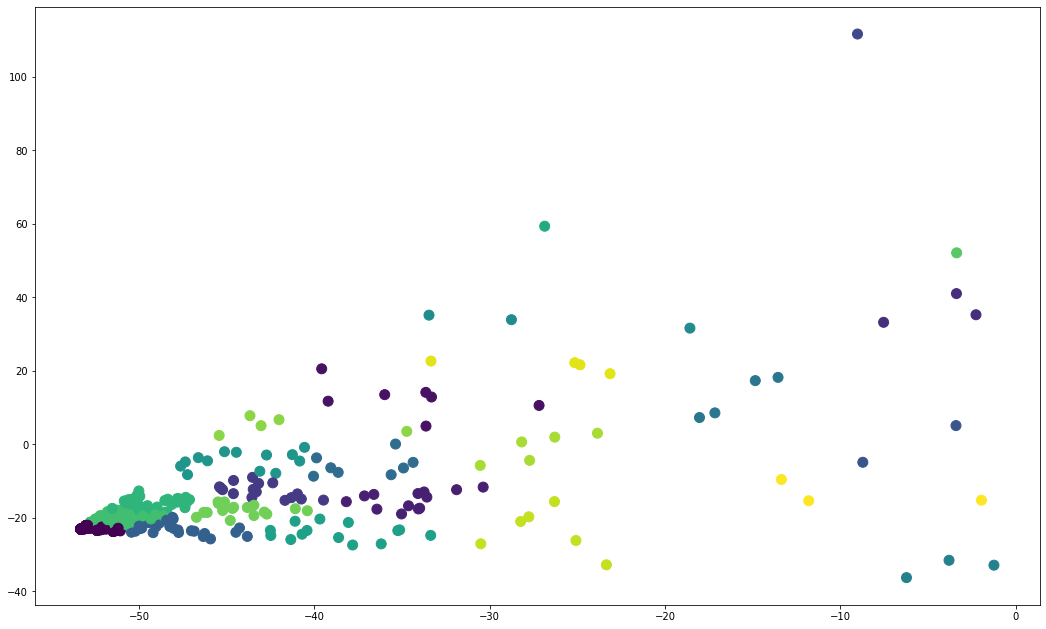

In [224]:
df_pca3 = df_pca.loc[df_pca['1'] <= 0]

kmeans = KMeans(n_clusters = 24, init = 'k-means++')
y_kmeans = kmeans.fit_predict(df_pca3)

fig, ax = plt.subplots(figsize=(18, 11))
plt.scatter(df_pca3['1'], df_pca3['2'], c=kmeans.labels_, s=100)
plt.show()

Va cogiendo forma, pero aún así, siguen con cierta dispersión. Reduzcamos a -50.

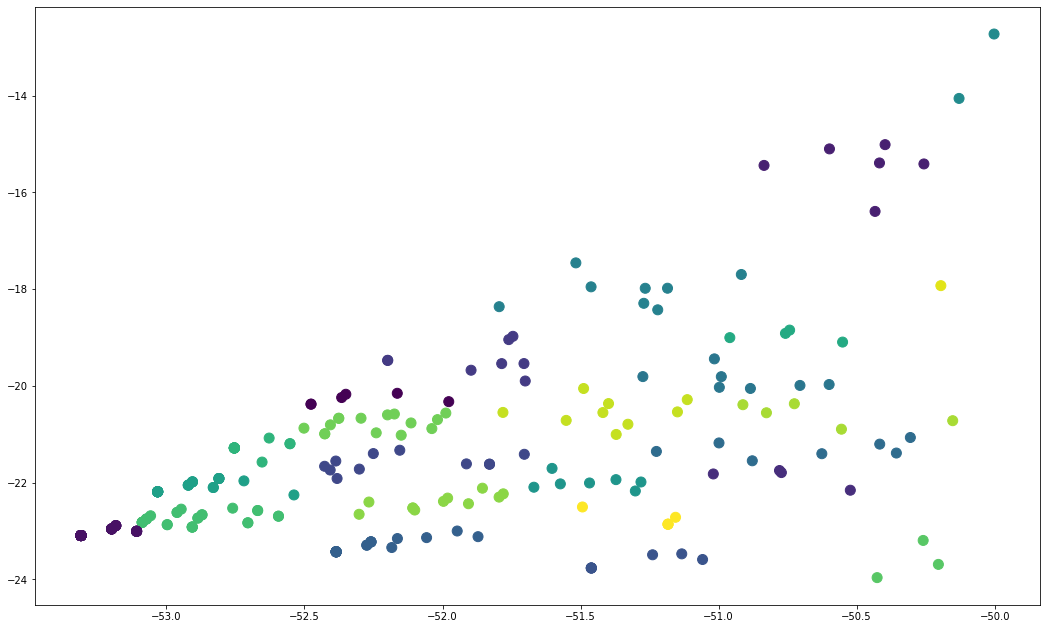

In [225]:
df_pca4 = df_pca.loc[df_pca['1'] <= -50]

kmeans = KMeans(n_clusters = 24, init = 'k-means++')
y_kmeans = kmeans.fit_predict(df_pca4)

fig, ax = plt.subplots(figsize=(18, 11))
plt.scatter(df_pca4['1'], df_pca4['2'], c=kmeans.labels_, s=100)
plt.show()

Realmente no parece que estos grupos sean muy significativos. Pero recordemos que hemos proyectado y eliminado todos los que estaban por encima de -50.

Volviendo a nuestro dataset, aunque nos sea muy complicado visualizarlo o comprobar si tenemos buenos resultados, vamos a aplicar los críterios internos para comprobar esto último. Pero antes apliquemos el método del codo para comprobar el k óptimo.

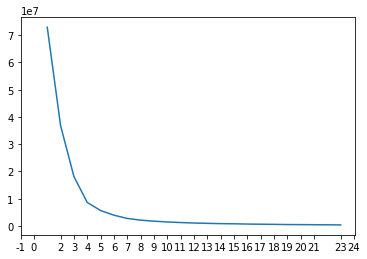

In [226]:
inercias = []
for i in range(1, 24):
    kmeans = KMeans(n_clusters = i, init = "k-means++", max_iter = 10, n_init = 10, random_state = 0)
    kmeans.fit(df)
    inercias.append(kmeans.inertia_)
figure, ax = plt.subplots()
ax.plot(range(1,24), inercias)
xmin, xmax = ax.get_xlim()
custom_ticks = np.linspace(xmin, xmax, 24, dtype=int)
ax.set_xticks(custom_ticks)
ax.set_xticklabels(custom_ticks)
print()

Segun lo que vemos aquí es mejor hacer 4 grupos, vamos a ver los resultados anteriores con este valor.

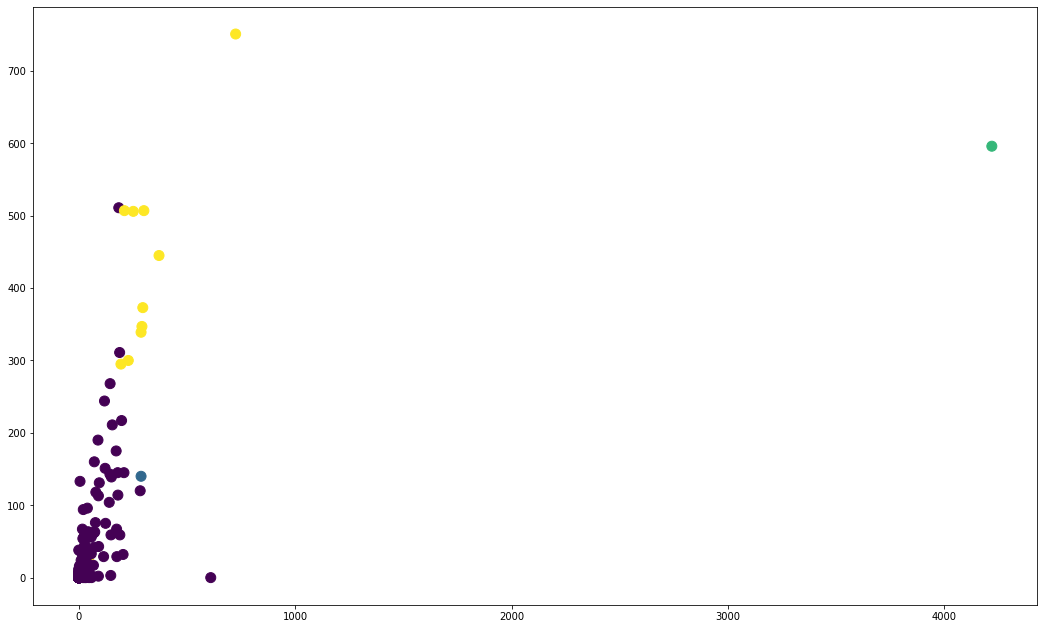

In [227]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++')
y_kmeans = kmeans.fit_predict(df)

fig, ax = plt.subplots(figsize=(18, 11))
plt.scatter(df['02'], df['01'], c=kmeans.labels_, s=100)
plt.show()

Parece que encuentra dos grandes grupos y dos espurios. Veamos quienes son esos dos espurios y los eliminamos, así tendríamos 2 grupos diferenciados, que tiene sentido, porque podrían ser las arañas y los insectos.

In [228]:
kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0,
       0, 3, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [229]:
aux1 = kmeans.labels_ == 0
aux2 = kmeans.labels_ == 3
df = df[aux1 | aux2]
df.reset_index(inplace=True, drop=True)
df

,01,02,03,04,05
0,17.0,11.0,15.0,11.0,15.0
1,13.0,24.0,18.0,14.0,13.0
2,8.0,7.0,6.0,4.0,15.0
3,32.0,205.0,24.0,22.0,8.0
4,4.0,3.0,2.0,5.0,0.0
...,...,...,...,...,...
543,20.0,35.0,71.0,17.0,5.0
544,2.0,0.0,8.0,14.0,1.0
545,2.0,1.0,9.0,0.0,0.0
546,0.0,1.0,0.0,0.0,0.0


Volvemos a aplicar el método del codo:

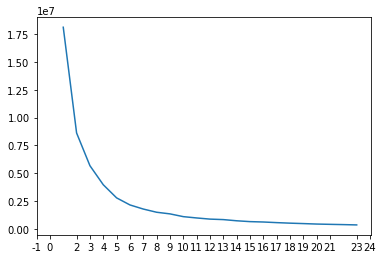

In [230]:
inercias = []
for i in range(1, 24):
    kmeans = KMeans(n_clusters = i, init = "k-means++", max_iter = 10, n_init = 10, random_state = 0)
    kmeans.fit(df)
    inercias.append(kmeans.inertia_)
figure, ax = plt.subplots()
ax.plot(range(1,24), inercias)
xmin, xmax = ax.get_xlim()
custom_ticks = np.linspace(xmin, xmax, 24, dtype=int)
ax.set_xticks(custom_ticks)
ax.set_xticklabels(custom_ticks)
print()

Efectivamente ahora nos indica k=2.

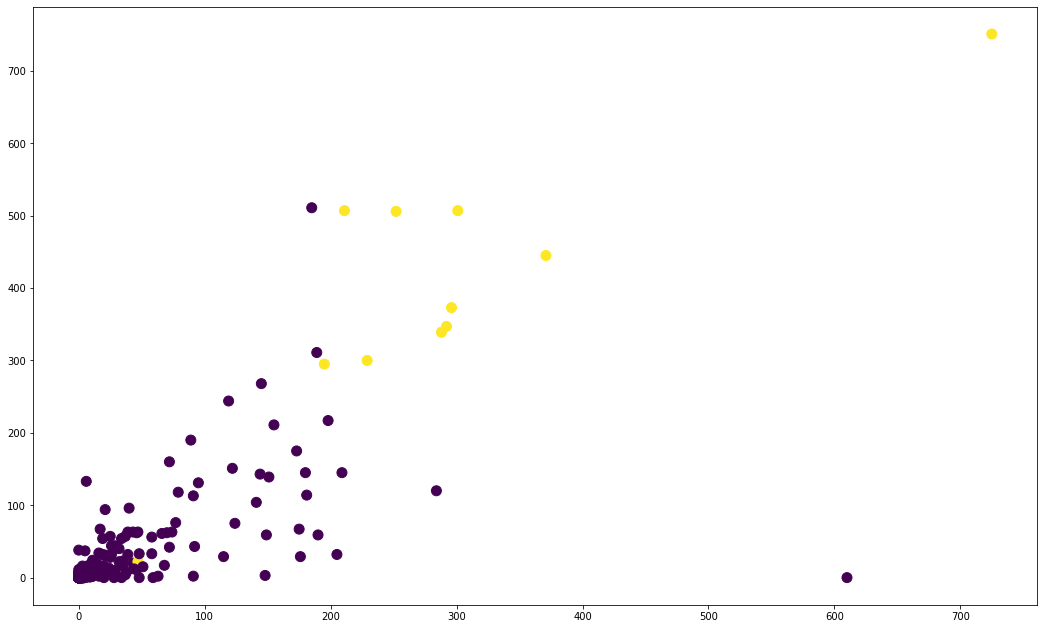

In [299]:
kmeans = KMeans(n_clusters = 2, init = 'k-means++')
y_kmeans = kmeans.fit_predict(df)

fig, ax = plt.subplots(figsize=(18, 11))
plt.scatter(df['02'], df['01'], c=kmeans.labels_, s=100)
plt.show()

Ahora parece que tiene algo más de sentido, el clustering. Y los grupos se ven algo más diferenciados.

Vamos a ver si proyectamos de nuevo como queda:

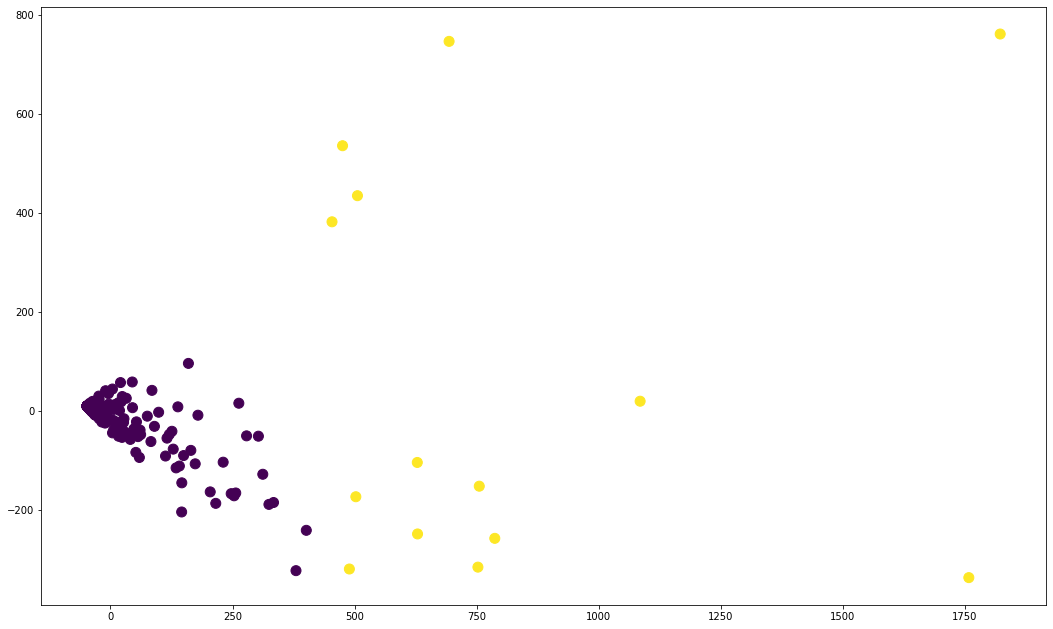

In [298]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df.values)

df_pca = pd.DataFrame()

df_pca['1'] = pca_result[:,0]
df_pca['2'] = pca_result[:,1]

kmeans = KMeans(n_clusters = 2, init = 'k-means++')
y_kmeans = kmeans.fit_predict(df_pca)

fig, ax = plt.subplots(figsize=(18, 11))
plt.scatter(df_pca['1'], df_pca['2'], c=kmeans.labels_, s=100)
plt.show()

Los resultados parecen más verosímiles. Hay un grupo muy disperso y otro más compacto. Pero parece que podemos diferenciar entre estos grupos.

Aplicamos criterios internos:

In [233]:
from sklearn import metrics

#Sacado del notebook tema4_02_CriteriosInternos.ipynb
print("Medidas internas para k-means con k=2:")
ss = metrics.silhouette_score(df, y_kmeans, metric='euclidean')
ch = metrics.calinski_harabasz_score(df, y_kmeans)
db = metrics.davies_bouldin_score(df, y_kmeans)

print("Coef. de silueta: {}" .format(ss))
print("Coef. de Calinski-Harabasz: {}" .format(ch))
print("Coef. de Davies-Bouldin: {}" .format(db))

Medidas internas para k-means con k=2:
Coef. de silueta: 0.9138723154317658
Coef. de Calinski-Harabasz: 602.6930707574786
Coef. de Davies-Bouldin: 0.6969617765072189


No salen valores exageradamente buenos, pero tampoco son para nada malos.

Aplicamos criterios externos:

Como sabemos a qué orden pertenece cada instancia. Vamos a agrupar en dos grandes grupos, insectos y arañas y comprobar a si los dos grupos obtenidos se corresponden con esto o siguen otra agrupación.

In [265]:
etiquetas = pd.read_csv('Etiquetas.csv', delimiter=';')
etiquetas.head(5)

,ID,Order,Clase
0,AR,Araneida,Arachnida
1,AC,Acari,Arachnida
2,BL,Blattaria,Insecta
3,CO,Coleoptera,Insecta
4,COL,Collembola,Insecta


In [286]:
#Volvemos a cargar los datos, para quedarnos con la primera columna que nos indica el orden
#para así relacionarlo con la clase a la que pertenecen.
df_et = []
for i in range(1, 11):
  df_et.append(pd.read_csv('Combi_{0}_2011.csv'.format(i), delimiter=';',
                        encoding= 'unicode_escape').fillna(0).iloc[:-1, :-1])
  df_et.append(pd.read_csv('Pitfal_{0}_2011.csv'.format(i), delimiter=';', 
                        encoding= 'unicode_escape').fillna(0).iloc[:-1, :-1])
ids = df_et[0]['Morphotypes']
aux = []
for i in df_et:
  aux.append(i.iloc[:,1:])
df_et = aux
df_et = reduce(lambda a, b: a.add(b, fill_value=0), df_et)
df_et['ID'] = ids
df_et['01'] = df_et['1'] + df_et['2'] + df_et['3']+ df_et['4'] + df_et['5']
df_et['02'] = df_et['6'] + df_et['7'] + df_et['8']+ df_et['9'] + df_et['10']
df_et['03'] = df_et['11'] + df_et['12'] + df_et['13']+ df_et['14'] + df_et['15']
df_et['04'] = df_et['16'] + df_et['17'] + df_et['18']+ df_et['19'] + df_et['20']
df_et['05'] = df_et['21'] + df_et['22'] + df_et['23']+ df_et['24'] + df_et['25']
df_et = df_et.iloc[: , 25:]
df_et.head(5)

,ID,01,02,03,04,05
0,AR.01,17.0,11.0,15.0,11.0,15.0
1,AR.02,13.0,24.0,18.0,14.0,13.0
2,AR.03,8.0,7.0,6.0,4.0,15.0
3,AR.04,32.0,205.0,24.0,22.0,8.0
4,AR.05,4.0,3.0,2.0,5.0,0.0


In [287]:
#Ahora necesitamos sacar la lista de códigos sin los números:
df_et['ID'] = df_et['ID'].str.split('.').str[0]
df_et
#Y ahora, dependiendo de qué codigo tenga necesitamos saber si es insecto o araña:
df_et = df_et.join(etiquetas.set_index('ID'), on='ID').drop('Order', axis=1)

In [292]:
df_et.Clase[df_et.Clase == 'Arachnida'] = 1
df_et.Clase[df_et.Clase == 'Insecta'] = 0

In [294]:
#Recordemos que habíamos eliminado dos espurios, vamos a eliminarlos aquí también:
df_et = df_et[aux1 | aux2]
df_et.reset_index(inplace=True, drop=True)
df_et

,ID,01,02,03,04,05,Clase
0,AR,17.0,11.0,15.0,11.0,15.0,1
1,AR,13.0,24.0,18.0,14.0,13.0,1
2,AR,8.0,7.0,6.0,4.0,15.0,1
3,AR,32.0,205.0,24.0,22.0,8.0,1
4,AR,4.0,3.0,2.0,5.0,0.0,1
...,...,...,...,...,...,...,...
543,TH,20.0,35.0,71.0,17.0,5.0,0
544,TH,2.0,0.0,8.0,14.0,1.0,0
545,TH,2.0,1.0,9.0,0.0,0.0,0
546,TH,0.0,1.0,0.0,0.0,0.0,0


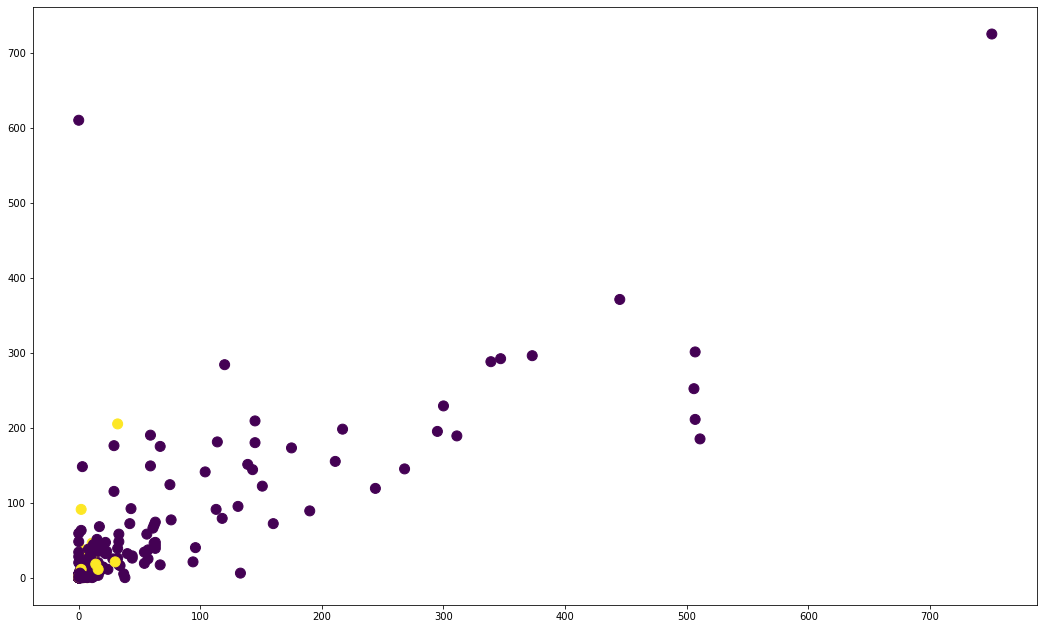

In [296]:
#Vemos los datos, para comprobar que todo está correcto:
fig, ax = plt.subplots(figsize=(18, 11))
plt.scatter(df_et['01'], df_et['02'], c=df_et['Clase'], s=100)
plt.show()

Parece el mismo data set. Ahora vamos a aplicar los criterios externos:

In [308]:
labels = df_et['Clase'].fillna(0).values

#Sacado del cuaderno 'tema4_03_CriteriosExternos.ipynb'
print("Medidas externas para k-means con k=2:")
ars = metrics.adjusted_rand_score(labels, y_kmeans)
fms = metrics.fowlkes_mallows_score(labels, y_kmeans)
vm = metrics.v_measure_score(labels, y_kmeans)
ami = metrics.adjusted_mutual_info_score(labels, y_kmeans)


print("Índice de Rand ajustado: {}" .format(ars))
print("Índice de Falkes-Mallow: {}" .format(fms))
print("V-medida: {}" .format(vm))
print("AMI: {}" .format(ami))

Medidas externas para k-means con k=2:
Índice de Rand ajustado: -0.036265698566642565
Índice de Falkes-Mallow: 0.8860331998056544
V-medida: 0.01167846542883544
AMI: 0.006656027313155585


Ya vemos que no estamos consiguiendo grupos separando las clases taxonómicas.

Puede que los grupos obtenidos sean por otra causa, pero se escapa del alcance de este trabajo.

## Otros Algoritmos

Ahora vamos a probar con estos datos un par de algoritmos no se han logrado ver en clase y comprobar qué tal funcionan.

### OPTICS

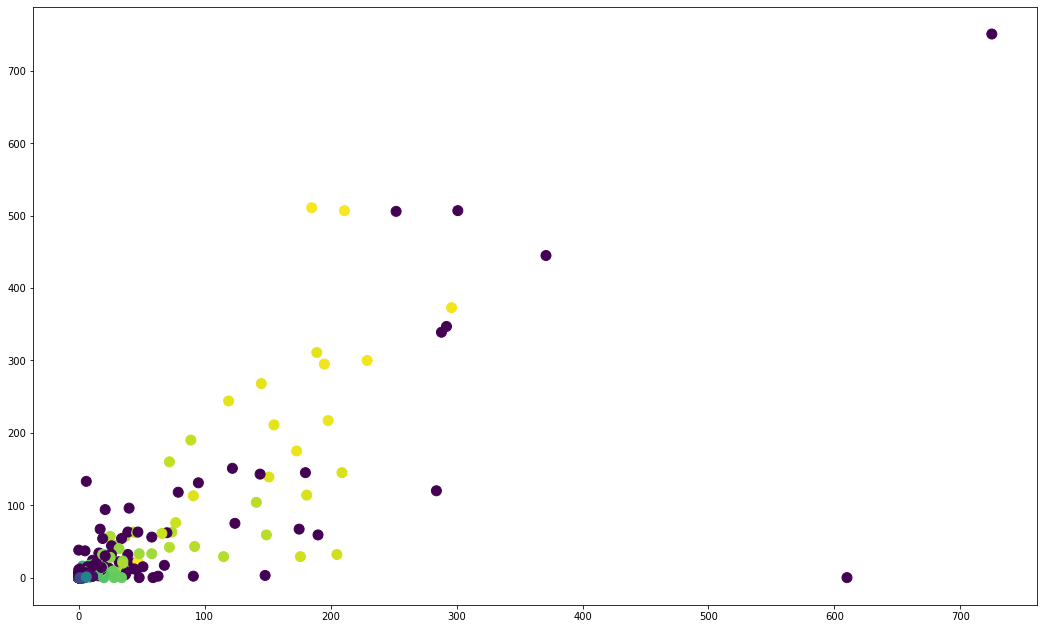

In [234]:
from sklearn.cluster import OPTICS

clustering = OPTICS(min_samples=2).fit(df)

fig, ax = plt.subplots(figsize=(18, 11))
plt.scatter(df['02'], df['01'], c=clustering.labels_, s=100)
plt.show()

Como no podemos ver bien qué grupos crea o si tienen sentido vamos a ir iterar para determinar el mejor valor del hiperparámetro 'min_samples'.

In [235]:
import warnings
warnings.filterwarnings("ignore")

silu = []
for i in range(2, 30):
  silu.append((metrics.silhouette_score(df, OPTICS(min_samples=i).fit(df).labels_, metric='euclidean'),i))

In [236]:
print(max(silu))

(0.1170148346574632, 2)


Vemos que ya habiamos cogido el máximo que es 'min_samples' = 2, vamos a ver qué tal los criterios internos:


(Los externos no los vemos porque como se muestra acontinuación nos hace muchos más grupos que nuestros dos iniciales).

In [310]:
clustering = OPTICS(min_samples=2).fit(df)
y_label = clustering.labels_

#¿Cuantos grupos encuentra?
print(max(clustering.labels_))
#Criterios internos:
print("Medidas internas para OPTICS con min_samples=2:")
ss = metrics.silhouette_score(df, y_label, metric='euclidean')
ch = metrics.calinski_harabasz_score(df, y_label)
db = metrics.davies_bouldin_score(df, y_label)

print("Coef. de silueta: {}" .format(ss))
print("Coef. de Calinski-Harabasz: {}" .format(ch))
print("Coef. de Davies-Bouldin: {}" .format(db))

97
Medidas internas para OPTICS con min_samples=2:
Coef. de silueta: 0.1170148346574632
Coef. de Calinski-Harabasz: 2.378159705432864
Coef. de Davies-Bouldin: 1.7458104295299286


No son buenos resultados.

###Spectral Clustering

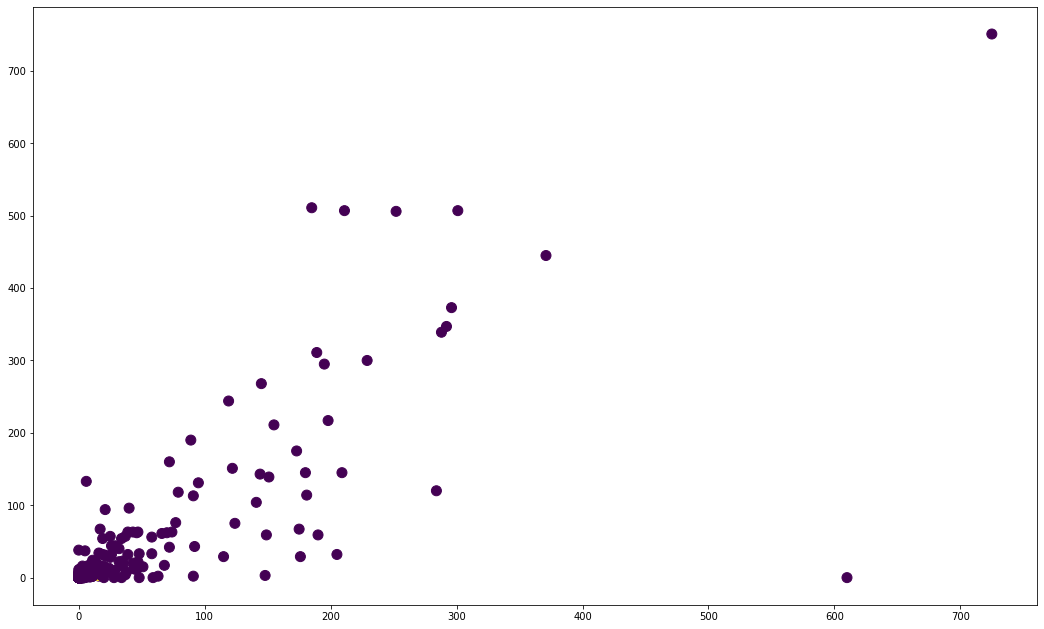

In [312]:
from sklearn.cluster import SpectralClustering

clustering = SpectralClustering(n_clusters=2, ).fit(df)
fig, ax = plt.subplots(figsize=(18, 11))
plt.scatter(df['02'], df['01'], c=clustering.labels_, s=100)
plt.show()

In [314]:
clustering = SpectralClustering(n_clusters=2).fit(df)
y_label = clustering.labels_

#¿Cuantos grupos encuentra?
print(max(clustering.labels_))
#Criterios internos:
print("Medidas internas para SpectralClustering con min_samples=2:")
ss = metrics.silhouette_score(df, y_label, metric='euclidean')
ch = metrics.calinski_harabasz_score(df, y_label)
db = metrics.davies_bouldin_score(df, y_label)

print("Coef. de silueta: {}" .format(ss))
print("Coef. de Calinski-Harabasz: {}" .format(ch))
print("Coef. de Davies-Bouldin: {}" .format(db))

1
Medidas internas para SpectralClustering con min_samples=2:
Coef. de silueta: 0.18046826215302506
Coef. de Calinski-Harabasz: 0.11343386651499324
Coef. de Davies-Bouldin: 1.3097941216747124


## Conclusión:

Vistos estos resultados no podemos sacar nada en claro, y como hemos simplificado mucho el problema puede que sea porque no tenemos columnas relevantes. Así que para finalizar con esta primera parte, vamos a añadir las columnas de en qué trampa fueron encontrados cada espécimen y en qué semana lo hicieron:

In [513]:
#Vamos a añadir dos columnas para cada trampa y diez más para cada semana:
df = []
for i in range(1, 11):

  sem = ''
  if i != 10:
    sem = 'S0'+str(i)
  else:
    sem = 'S'+str(i)

  comb = pd.read_csv('Combi_{0}_2011.csv'.format(i), delimiter=';',
                        encoding= 'unicode_escape').fillna(0).iloc[:-1 , 1:]
  aux = comb.TOTAL == 0
  aux = aux.astype(int)
  comb['Comb'] = aux
  comb[sem] = aux
  df.append(comb)
  pit = pd.read_csv('Pitfal_{0}_2011.csv'.format(i), delimiter=';', 
                        encoding= 'unicode_escape').fillna(0).iloc[:-1, 1:]
  aux = pit.TOTAL == 0
  aux = aux.astype(int)
  pit['Pit'] = aux
  pit[sem] = aux
  df.append(pit)
df = reduce(lambda a, b: a.add(b, fill_value=0), df)
df.S01[df.S01 > 0] = 1
df.S02[df.S02 > 0] = 1
df.S03[df.S03 > 0] = 1
df.S04[df.S04 > 0] = 1
df.S05[df.S05 > 0] = 1
df.S06[df.S06 > 0] = 1
df.S07[df.S07 > 0] = 1
df.S08[df.S08 > 0] = 1
df.S09[df.S09 > 0] = 1
df.S10[df.S10 > 0] = 1
df.Comb[df.Comb > 0] = 1
df.Pit[df.Pit > 0] = 1
df['01'] = df['1'] + df['2'] + df['3']+ df['4'] + df['5']
df['02'] = df['6'] + df['7'] + df['8']+ df['9'] + df['10']
df['03'] = df['11'] + df['12'] + df['13']+ df['14'] + df['15']
df['04'] = df['16'] + df['17'] + df['18']+ df['19'] + df['20']
df['05'] = df['21'] + df['22'] + df['23']+ df['24'] + df['25']
df = df.iloc[: , 25:]
df
df.head(5)

,Comb,Pit,S01,S02,S03,S04,S05,S06,S07,S08,S09,S10,TOTAL,01,02,03,04,05
0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,69,17.0,11.0,15.0,11.0,15.0
1,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,82,13.0,24.0,18.0,14.0,13.0
2,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,40,8.0,7.0,6.0,4.0,15.0
3,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,291,32.0,205.0,24.0,22.0,8.0
4,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,14,4.0,3.0,2.0,5.0,0.0


Comprobemos ahora con KMeans y el método del codo qué k usar:

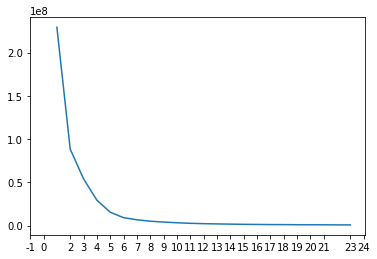

In [363]:
inercias = []
for i in range(1, 24):
    kmeans = KMeans(n_clusters = i, init = "k-means++", max_iter = 10, n_init = 10, random_state = 0)
    kmeans.fit(df)
    inercias.append(kmeans.inertia_)
figure, ax = plt.subplots()
ax.plot(range(1,24), inercias)
xmin, xmax = ax.get_xlim()
custom_ticks = np.linspace(xmin, xmax, 24, dtype=int)
ax.set_xticks(custom_ticks)
ax.set_xticklabels(custom_ticks)
print()

Parece que k debería ser dos, vamos a probar:

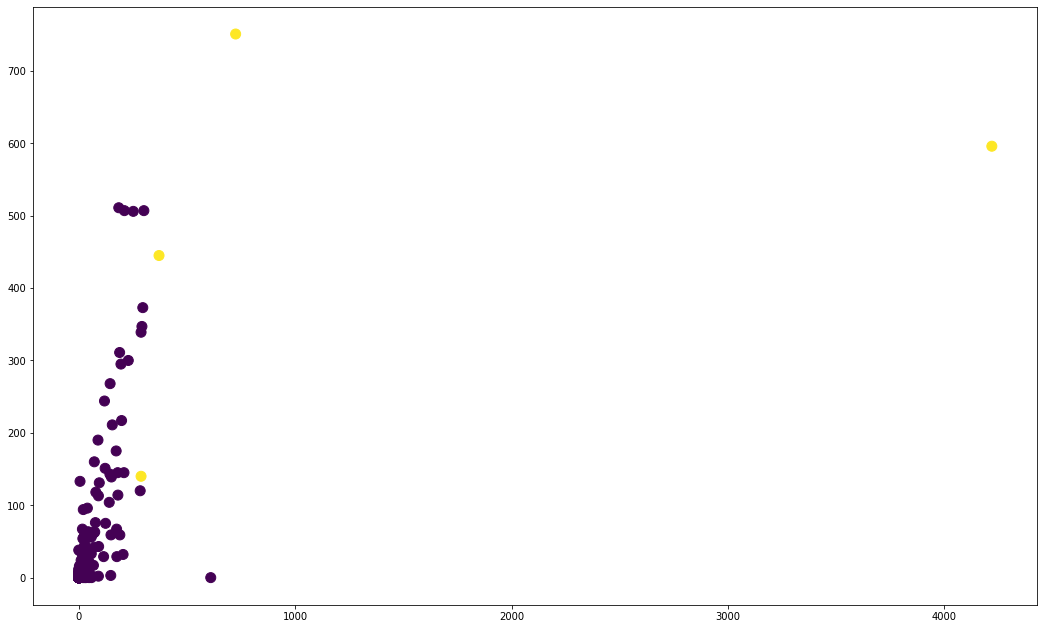

In [364]:
kmeans = KMeans(n_clusters = 2, init = 'k-means++')
y_kmeans = kmeans.fit_predict(df)

fig, ax = plt.subplots(figsize=(18, 11))
plt.scatter(df['02'], df['01'], c=kmeans.labels_, s=100)
plt.show()

Vamos a ver eliminando los espurios:

In [365]:
df = df[aux1 | aux2]
df.reset_index(inplace=True, drop=True)

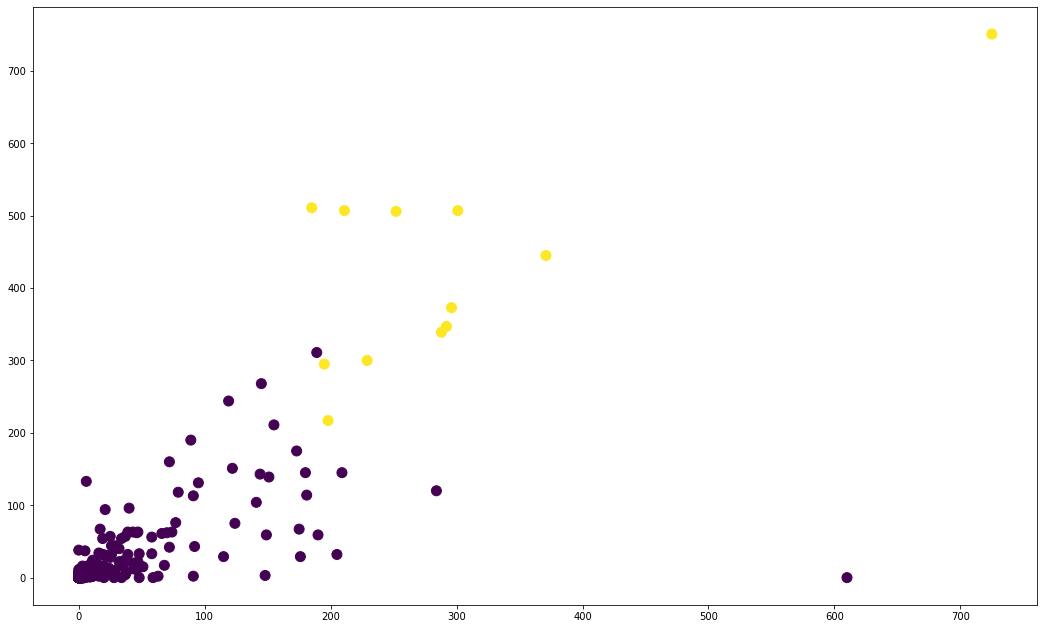

In [366]:
kmeans = KMeans(n_clusters = 2, init = 'k-means++')
y_kmeans = kmeans.fit_predict(df)

fig, ax = plt.subplots(figsize=(18, 11))
plt.scatter(df['02'], df['01'], c=kmeans.labels_, s=100)
plt.show()

In [367]:
df.describe()

,Comb,Pit,S01,S02,S03,S04,S05,S06,S07,S08,S09,S10,TOTAL,01,02,03,04,05
count,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000
mean,0.939781,0.987226,0.937956,0.910584,0.908759,0.937956,0.941606,0.916058,0.921533,0.947080,0.936131,0.921533,107.302920,21.114964,21.330292,20.917883,18.885036,26.432482
std,0.238109,0.112399,0.241455,0.285604,0.288214,0.241455,0.234702,0.277554,0.269151,0.224078,0.244742,0.269151,346.598282,72.102301,62.979019,67.809407,64.979898,123.068481
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10.000000,1.000000,2.000000,2.000000,2.000000,1.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,44.000000,7.000000,10.000000,8.000000,8.000000,7.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4097.000000,751.000000,725.000000,780.000000,852.000000,1842.000000


Los resultados si que son ligeramente diferentes, pero tampoco realmente interesantes. Vamos a probar a proyectar en dos dimensiones a ver si ha habido un cambio significativo:

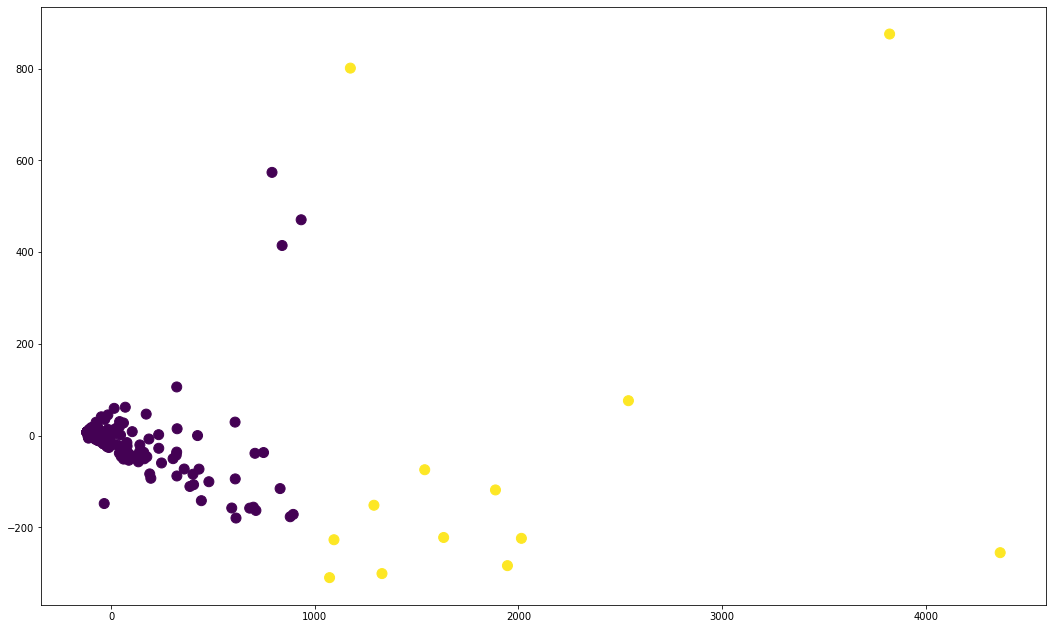

In [368]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df.values)

df_pca = pd.DataFrame()

df_pca['1'] = pca_result[:,0]
df_pca['2'] = pca_result[:,1]

kmeans = KMeans(n_clusters = 2, init = 'k-means++')
y_kmeans = kmeans.fit_predict(df_pca)

fig, ax = plt.subplots(figsize=(18, 11))
plt.scatter(df_pca['1'], df_pca['2'], c=kmeans.labels_, s=100)
plt.show()

Ya para finalizar con estos datos, vamos a probar los algoritmos anteriores, a ver si hay diferencias:

OPTICS, vamos a ver qué 'min_samples' usar y con qué métrica:

In [376]:
eu = []
cos = []
man = []
mik = []
for i in range(2, 30):
  eu.append((metrics.silhouette_score(df, OPTICS(min_samples=i, metric='euclidean').fit(df).labels_, metric='euclidean'),i))
  cos.append((metrics.silhouette_score(df, OPTICS(min_samples=i, metric='cosine').fit(df).labels_, metric='euclidean'),i))
  man.append((metrics.silhouette_score(df, OPTICS(min_samples=i, metric='cityblock').fit(df).labels_, metric='euclidean'),i))
  mik.append((metrics.silhouette_score(df, OPTICS(min_samples=i, metric='minkowski').fit(df).labels_, metric='euclidean'),i))
print(f'Euclídea: {max(eu)}')
print(f'Coseno: {max(cos)}')
print(f'Manhattan: {max(man)}')
print(f'Minkoski: {max(mik)}')

Euclídea: (0.10700210809997923, 2)
Coseno: (-0.0033650111196903633, 2)
Manhattan: (0.07583042060502629, 2)
Minkoski: (0.10700210809997923, 2)


Ya vemos que no obtenemos ningún resultado favorable.

Spectral Clustering:

In [407]:
res = []
for i in range(2,25):
  res.append((metrics.silhouette_score(df, SpectralClustering(n_clusters=i, assign_labels="discretize", random_state=0).fit(df).labels_, metric='euclidean'),i))
print(f'n_clusters: {max(res)}')

n_clusters: (0.5325022802977498, 4)


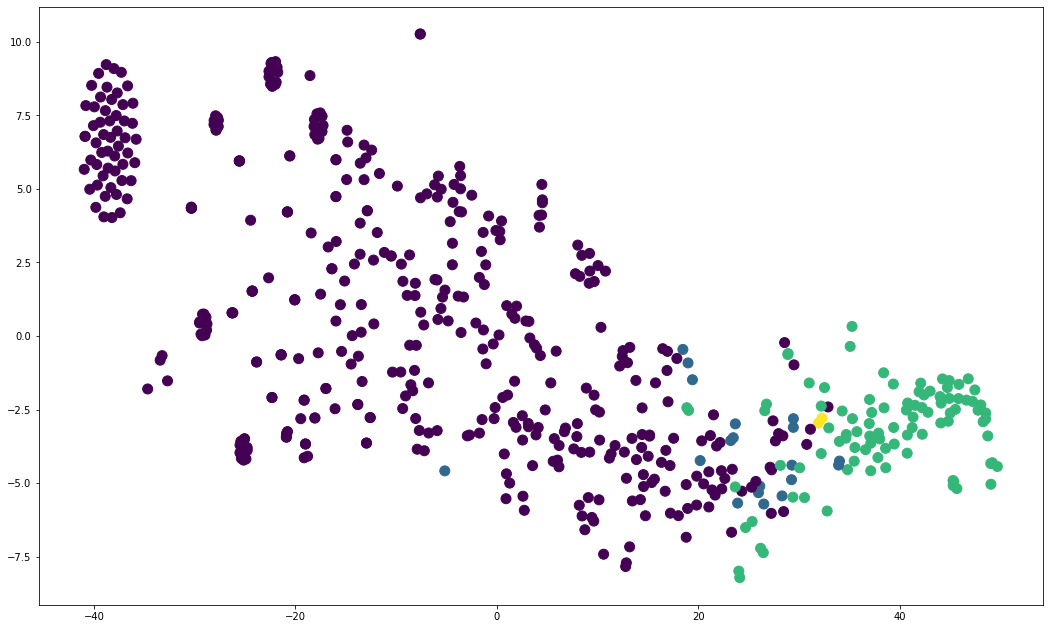

In [408]:
from sklearn.manifold import TSNE

df_tsne = TSNE(learning_rate=50).fit_transform(df)

clustering = SpectralClustering(n_clusters=4, assign_labels="discretize").fit(df)
fig, ax = plt.subplots(figsize=(18, 11))
plt.scatter(df_tsne[:, 0], df_tsne[:, 1], c=clustering.labels_, s=100)
plt.show()

Estos 4 grupos pueden resultar interesantes, pues realmente no solo hay arañas e insectos. Hay un grupo de Collembola que son muy similares a los insectos y el grupo de Myriapoda que también son parecidos a los insectos, y por sencillez los hemos agrupado como insectos. Pero vamos a comprobar si con estas 4 etiquetas los criterios externos mejoran.

In [411]:
etiquetas = pd.read_csv('Etiquetas_Comp.csv', delimiter=';')
etiquetas.head(5)

,ID,Order,Clase
0,AR,Araneida,Arachnida
1,AC,Acari,Arachnida
2,BL,Blattaria,Insecta
3,CO,Coleoptera,Insecta
4,COL,Collembola,Collembola


In [499]:
df_et = []
for i in range(1, 11):
  df_et.append(pd.read_csv('Combi_{0}_2011.csv'.format(i), delimiter=';',
                        encoding= 'unicode_escape').fillna(0).iloc[:-1, :-1])
  df_et.append(pd.read_csv('Pitfal_{0}_2011.csv'.format(i), delimiter=';', 
                        encoding= 'unicode_escape').fillna(0).iloc[:-1, :-1])
ids = df_et[0]['Morphotypes']
aux = []
for i in df_et:
  aux.append(i.iloc[:,1:])
df_et = aux
df_et = reduce(lambda a, b: a.add(b, fill_value=0), df_et)
df_et['ID'] = ids
df_et = df_et.iloc[: , 25:]
df_et['ID'] = df_et['ID'].str.split('.').str[0]
df_et
#Y ahora, dependiendo de qué codigo tenga necesitamos saber si es insecto o araña:
df_et = df_et.join(etiquetas.set_index('ID'), on='ID').drop('Order', axis=1)

df_et.Clase[df_et.Clase == 'Myriapoda'] = 3
df_et.Clase[df_et.Clase == 'Collembola'] = 2
df_et.Clase[df_et.Clase == 'Arachnida'] = 1
df_et.Clase[df_et.Clase == 'Insecta'] = 0

labels = df_et['Clase'].fillna(0).values

#Sacado del cuaderno 'tema4_03_CriteriosExternos.ipynb'
print("Medidas externas para Spectral Clustering con k=4:")
ars = metrics.adjusted_rand_score(labels, clustering.labels_)
fms = metrics.fowlkes_mallows_score(labels, clustering.labels_)
vm = metrics.v_measure_score(labels, clustering.labels_)
ami = metrics.adjusted_mutual_info_score(labels, clustering.labels_)


print("Índice de Rand ajustado: {}" .format(ars))
print("Índice de Falkes-Mallow: {}" .format(fms))
print("V-medida: {}" .format(vm))
print("AMI: {}" .format(ami))

Medidas externas para Spectral Clustering con k=4:
Índice de Rand ajustado: 0.10200744380227578
Índice de Falkes-Mallow: 0.8929577246203879
V-medida: 0.1579564873471746
AMI: 0.15275305946891593


Pues podemos comprobar que no, esos grupos conseguidos no corresponden con las clases que nosotros tenemos.

Por último parece interesante ya que soy especies taxonómicas agrupar por dendogramas, vamos a realizarlo con la distancias del coseno para relativizar las apariciones que encontramos. Así como se hace con el tratamiento de texto a ver qué sale:

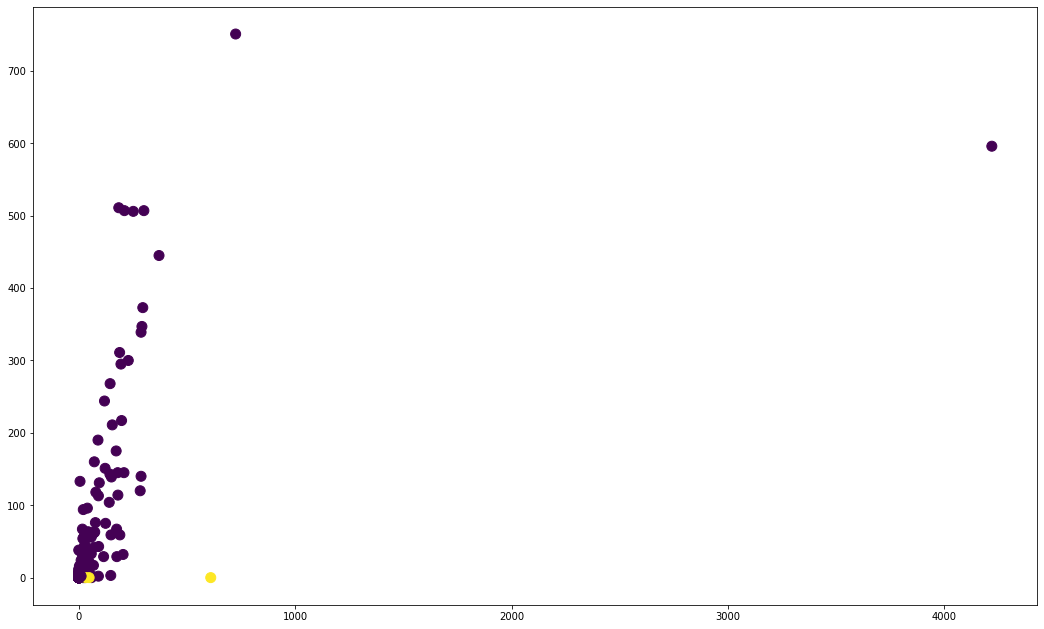

In [444]:
from sklearn.cluster import AgglomerativeClustering

clustering = AgglomerativeClustering(affinity='cosine', linkage='average').fit(df)

fig, ax = plt.subplots(figsize=(18, 11))
plt.scatter(df['02'], df['01'], c=clustering.labels_, s=100)
plt.show()

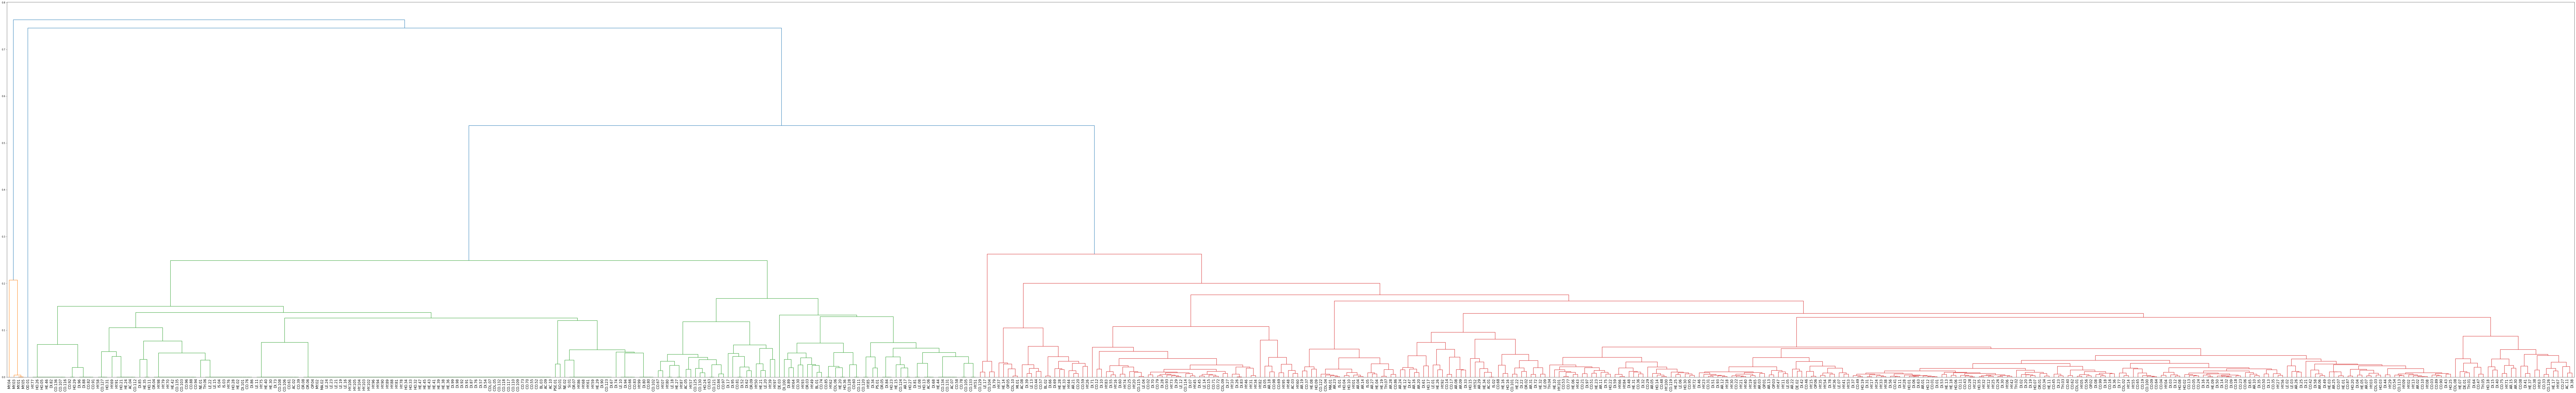

In [443]:
import scipy.cluster.hierarchy as sch

enlace = sch.linkage(df, method='average', metric='cosine')
plt.subplots(figsize=(200, 30))

dendograma = sch.dendrogram(enlace, labels=ids.values, leaf_font_size=15)

Vemos que el dendograma es realmente interesante, y practicamente todos los Myriapoda que son una clase a parte, los ha separado del resto, cosa que tiene buena pinta. Por hacer una prueba más allá vamos a agrupar todos los datos por orden taxonómico y volver a calcular el dendograma:

In [514]:
ids = ids.str.split('.').str[0]
df['CL'] = ids
df = df.groupby('CL').sum()
df.reset_index(inplace=True)
df

,CL,Comb,Pit,S01,S02,S03,S04,S05,S06,S07,S08,S09,S10,TOTAL,01,02,03,04,05
0,AC,11.0,11.0,11.0,11.0,11.0,11.0,11.0,10.0,11.0,11.0,11.0,11.0,38,7.0,11.0,12.0,3.0,5.0
1,AR,31.0,29.0,27.0,21.0,22.0,29.0,27.0,25.0,25.0,25.0,28.0,27.0,1126,178.0,525.0,145.0,150.0,128.0
2,BL,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,10,1.0,1.0,1.0,6.0,1.0
3,CO,126.0,136.0,123.0,125.0,124.0,127.0,131.0,123.0,128.0,129.0,131.0,122.0,27432,4410.0,3919.0,4027.0,4009.0,11067.0
4,COL,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,384,35.0,139.0,84.0,95.0,31.0
5,DE,3.0,3.0,3.0,2.0,1.0,2.0,1.0,3.0,2.0,2.0,2.0,2.0,80,10.0,5.0,41.0,13.0,11.0
6,DI,90.0,100.0,92.0,91.0,94.0,98.0,93.0,92.0,95.0,97.0,91.0,95.0,23632,4776.0,3647.0,4244.0,4176.0,6789.0
7,HE,45.0,47.0,47.0,43.0,41.0,43.0,44.0,41.0,41.0,46.0,46.0,43.0,809,185.0,208.0,197.0,172.0,47.0
8,HO,33.0,35.0,33.0,31.0,30.0,34.0,33.0,31.0,32.0,33.0,32.0,31.0,2363,478.0,539.0,599.0,387.0,360.0
9,HY,99.0,104.0,100.0,98.0,98.0,94.0,99.0,100.0,95.0,100.0,96.0,98.0,15222,2056.0,6140.0,2321.0,2199.0,2506.0


In [515]:
df = df.drop('TOTAL', axis = 1)

In [516]:
df.S01[df.S01 > 0] = 1
df.S02[df.S02 > 0] = 1
df.S03[df.S03 > 0] = 1
df.S04[df.S04 > 0] = 1
df.S05[df.S05 > 0] = 1
df.S06[df.S06 > 0] = 1
df.S07[df.S07 > 0] = 1
df.S08[df.S08 > 0] = 1
df.S09[df.S09 > 0] = 1
df.S10[df.S10 > 0] = 1
df.Comb[df.Comb > 0] = 1
df.Pit[df.Pit > 0] = 1
df

,CL,Comb,Pit,S01,S02,S03,S04,S05,S06,S07,S08,S09,S10,01,02,03,04,05
0,AC,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,7.0,11.0,12.0,3.0,5.0
1,AR,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,178.0,525.0,145.0,150.0,128.0
2,BL,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,6.0,1.0
3,CO,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,4410.0,3919.0,4027.0,4009.0,11067.0
4,COL,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,35.0,139.0,84.0,95.0,31.0
5,DE,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,10.0,5.0,41.0,13.0,11.0
6,DI,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,4776.0,3647.0,4244.0,4176.0,6789.0
7,HE,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,185.0,208.0,197.0,172.0,47.0
8,HO,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,478.0,539.0,599.0,387.0,360.0
9,HY,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2056.0,6140.0,2321.0,2199.0,2506.0


In [517]:
ids = df['CL']
df = df.drop('CL', axis=1)
df

,Comb,Pit,S01,S02,S03,S04,S05,S06,S07,S08,S09,S10,01,02,03,04,05
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,7.0,11.0,12.0,3.0,5.0
1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,178.0,525.0,145.0,150.0,128.0
2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,6.0,1.0
3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,4410.0,3919.0,4027.0,4009.0,11067.0
4,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,35.0,139.0,84.0,95.0,31.0
5,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,10.0,5.0,41.0,13.0,11.0
6,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,4776.0,3647.0,4244.0,4176.0,6789.0
7,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,185.0,208.0,197.0,172.0,47.0
8,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,478.0,539.0,599.0,387.0,360.0
9,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2056.0,6140.0,2321.0,2199.0,2506.0


In [519]:
df = df.iloc[:,12:]

In [520]:
df

,01,02,03,04,05
0,7.0,11.0,12.0,3.0,5.0
1,178.0,525.0,145.0,150.0,128.0
2,1.0,1.0,1.0,6.0,1.0
3,4410.0,3919.0,4027.0,4009.0,11067.0
4,35.0,139.0,84.0,95.0,31.0
5,10.0,5.0,41.0,13.0,11.0
6,4776.0,3647.0,4244.0,4176.0,6789.0
7,185.0,208.0,197.0,172.0,47.0
8,478.0,539.0,599.0,387.0,360.0
9,2056.0,6140.0,2321.0,2199.0,2506.0


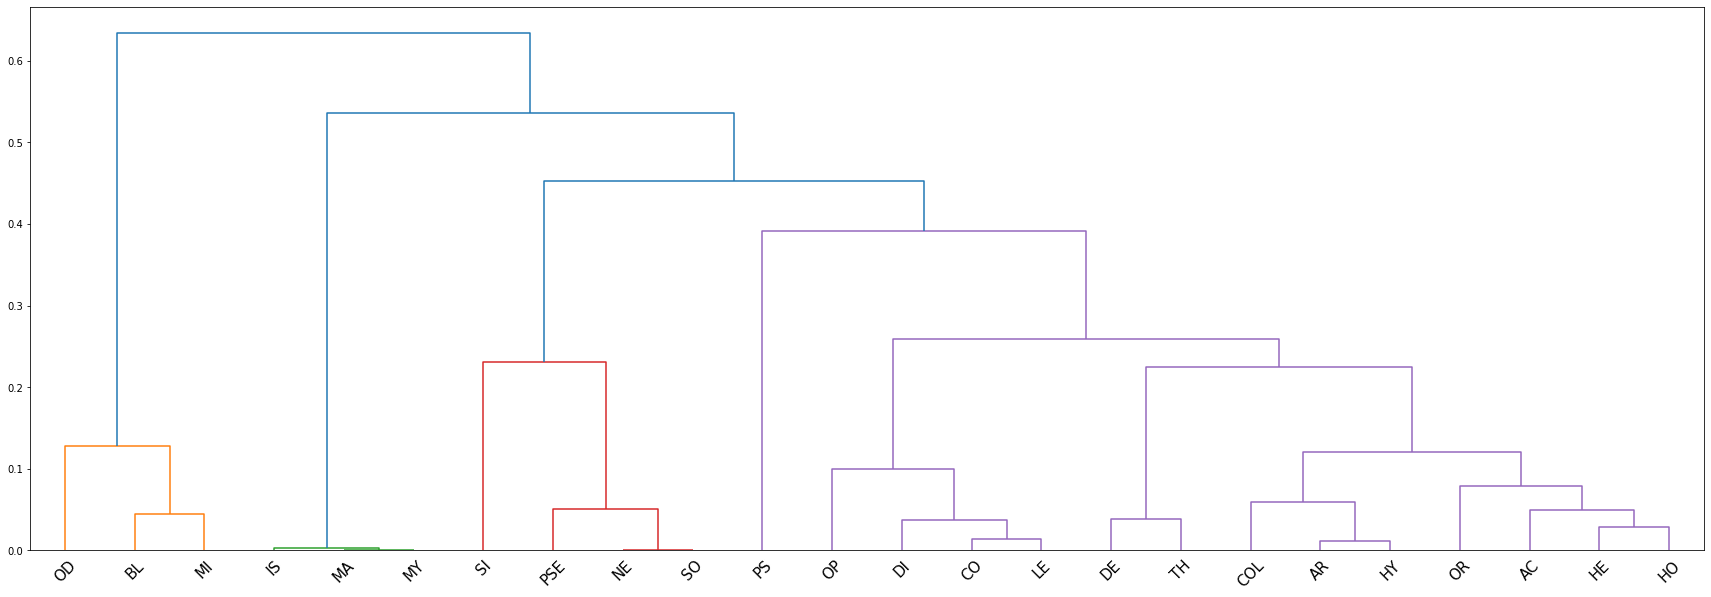

In [525]:
enlace = sch.linkage(df, method='average', metric='cosine')
plt.subplots(figsize=(30, 10))

dendograma = sch.dendrogram(enlace, labels=ids.values, leaf_font_size=15)

Sale Algo vistoso también, pero no termina de tener demasiado sentido. Por lo menos referente al orden taxonómico. Igual un biólogo podría encontrar características comunes y dotarle de un significado.

Así que quedándonos con el anterior dendograma y viendo que tiene algo más de sentido. Podemos determinar que con más datos, quizá datos biométricos sobre los insectos recogidos, si que tendría total sentido aplicar clustering. Y sobre todo, que quizá algún experto en este tema, viendo el dendograma, pueda determinar que existe algún tipo de relación entre lo que nos dice el dendograma y la biología.

Hecho todo esto, vamos a terminar este apartado y centrarnos en Spectral Clustering.

# 2. Spectral Clustering

El objetivo de esta segunda parte es profundizar en este algoritmo y probarlo en un dataset que sí nos permita hacer clustering.

## Explicación del algoritmo